In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision.all import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/bdd100k-period-classification/val/unknown/b2ea3465-78dea25f.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/b804f988-6eff91ef.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/b869965a-fa59f431.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/c57caddc-26ab6ed5.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/b6270d75-6999f310.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/bae5dc33-65cbc3f4.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/be41362b-587a17b4.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/beaae4eb-f6975a4f.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/bc886d37-5b22c313.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/bb919332-8ea8b53f.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/c356bbec-10171932.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/bc715fc7-87a29be4.jpg
/kaggle/input/bdd100k-period-classification/val/unknown/b8da2353

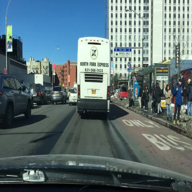

In [12]:
import path
path = Path('/kaggle/input/')
im = Image.open(path/'bdd100k-period-classification/train/daytime/a67050d8-13a43f2f.jpg').resize((192,192))
im

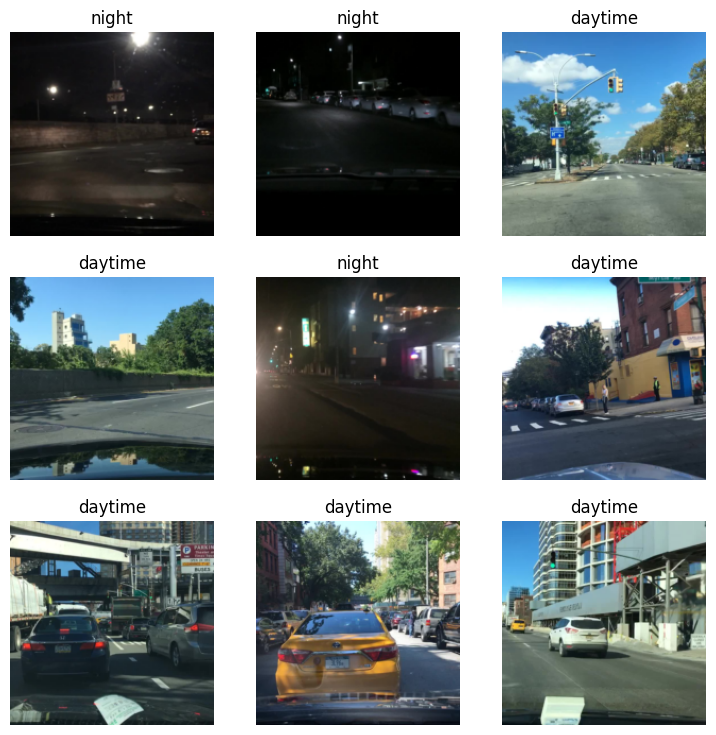

In [16]:
path = Path('/kaggle/input/bdd100k-period-classification/')
dls = ImageDataLoaders.from_folder(path, train ='train', valid='val', seed = 33, item_tfms = Resize(192))
dls.show_batch()

In [17]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 57.2MB/s]


In [18]:
learn.fine_tune(2)

In [22]:
lrs = learn.lr_find()

OSError: [Errno 30] Read-only file system: '/kaggle/input/bdd100k-period-classification/models'

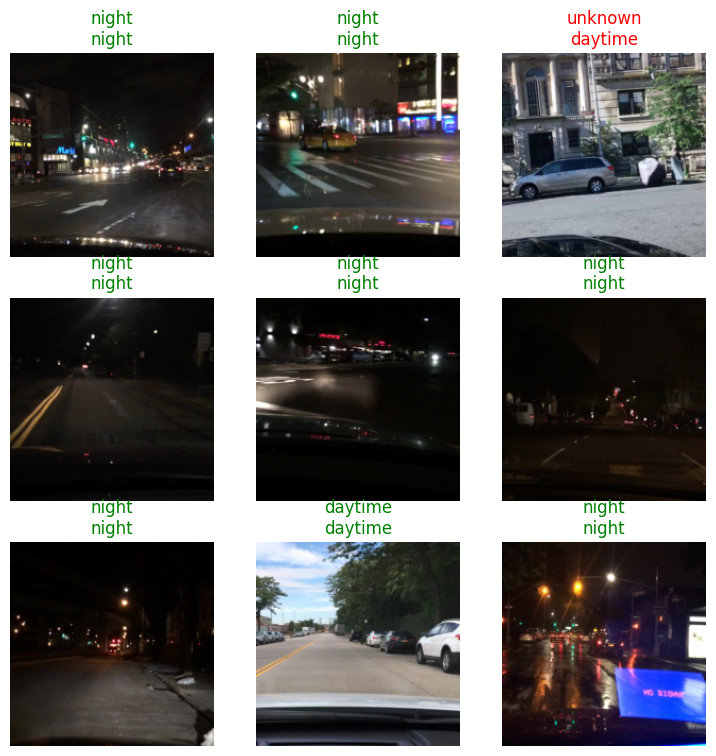

In [21]:
learn.show_results()

In [48]:
path = Path('/kaggle/input/bdd100k-period-classification/test/e9cc8002-fbed7a1d.jpg')
# for i in path:
im =Image.open('/kaggle/input/bdd100k-period-classification/test/e9cc8002-fbed7a1d.jpg').resize((192,192))
im
prediction,_,probs = learn.predict(path)
max_prob = max(probs)
print(f"The image is of {prediction} with probability of {max_prob}" )


The image is of daytime with probability of 0.9992426633834839


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 64.3MB/s]


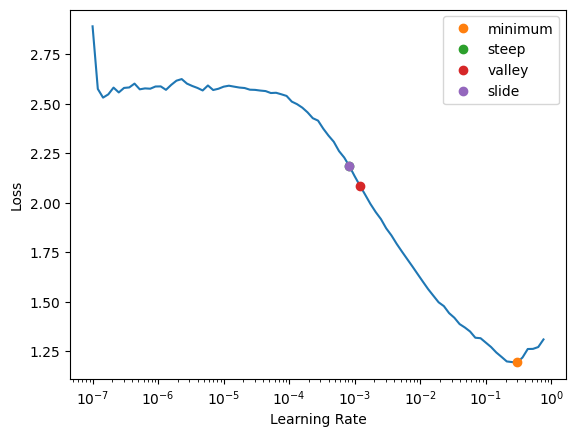

In [30]:
learn = vision_learner(dls, resnet18, metrics = error_rate,  model_dir="/tmp/model/")
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
# learn.fine_tune(2)


In [54]:
path = Path('/kaggle/input/bdd100k-period-classification/test/')
output = dict()
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print (filename)
        output['key'] = filename
        prediction,_,probs = learn.predict(os.path.join(dirname, filename))
        max_prob = max(probs)
        print(prediction)
        output['value'] = prediction
# print(f"The image is of {prediction} with probability of {max_prob}" )
# print (output)

f9fda151-4106b997.jpg


daytime
d74da9b6-67e4a930.jpg


daytime
f6222b96-827933c1.jpg


daytime
cae29b60-b9d5bdb6.jpg


daytime
e97a4373-53890fe1.jpg


daytime
ef699add-67c80f24.jpg


daytime
da489e07-6900546f.jpg


daytime
fdaa89bf-ee246ee5.jpg


daytime
e1fbb050-d4bcd12a.jpg


daytime
cebfb852-c7263f8d.jpg


daytime
d3fa52c8-974525fd.jpg


daytime
d6917d62-5314c6c3.jpg


daytime
e8c71eb0-f1253623.jpg


daytime
fc607aef-36fd9a5f.jpg


daytime
cddee055-c4d1b514.jpg


daytime
cf426ff7-c7550714.jpg


daytime
f0dc86e2-8d852f3a.jpg


daytime
eb8f757f-9c894650.jpg


daytime
e2c8460c-01dee5c8.jpg


daytime
d1cd6e95-f5678e1c.jpg


daytime
e37e3c4d-3521787f.jpg


daytime
eb6ec689-daf843a8.jpg


daytime
d1eca5ce-3710aaf3.jpg


daytime
f8a89a5f-855ef0f6.jpg


daytime
e3e5abea-7191edcf.jpg


daytime
ddec177f-5dee4857.jpg


daytime
d56de349-a30091e5.jpg


daytime
fa36b147-8e6e1dc0.jpg


daytime
d3979f6e-3c810bc6.jpg


daytime
d42f9127-1f316d15.jpg


daytime
d942978e-8d352eb0.jpg


daytime
caf73e65-16760e37.jpg


daytime
df2de550-c997b83e.jpg


daytime
e032713f-8800c4a9.jpg


daytime
d106b61b-aa4990cb.jpg


daytime
f06e03be-c9f99f77.jpg


daytime
dc91496e-700f7b34.jpg


daytime
cbf2d780-372a5267.jpg


daytime
eda473f5-d2775cfb.jpg


daytime
d258b0e9-780909da.jpg


daytime
e4be94e0-d0451b4c.jpg


daytime
ddc6040b-3466a22f.jpg


daytime
e3d968f8-858304b5.jpg


night
d6d4abc4-28b6fbf7.jpg


daytime
d483fd6d-46122319.jpg


daytime
fca4ec46-182b47c9.jpg


daytime
e8e03580-77ab5daf.jpg


daytime
d095d925-c13636b0.jpg


daytime
f8a94328-0e2dd603.jpg


daytime
f1f64069-bb312274.jpg


daytime
f79147dd-2c305a71.jpg


daytime
fa498251-0b5ec36a.jpg


daytime
e4152b55-a6c14fec.jpg


daytime
d493e87c-dae9b3f3.jpg


daytime
e98ceed7-53f8bd60.jpg


daytime
e35d3d78-ab057438.jpg


daytime
dcbab459-c8e7a67f.jpg


daytime
f2b659fc-071d2bbc.jpg


daytime
e3abd682-69feb99c.jpg


daytime
f31085fc-f3890965.jpg


daytime
f9cb3bee-6a495062.jpg


daytime
f9b78c98-4348e4e1.jpg


daytime
ed70db0f-7b7f9e76.jpg


daytime
f9fc19e1-e1c2f524.jpg


daytime
d9138cfd-b6c35db8.jpg


daytime
de5adaec-ce5b5073.jpg


daytime
e665462c-d2e21176.jpg


daytime
ec2fb497-3c472617.jpg


daytime
e16c96a5-a6cf84fc.jpg


daytime
dbf0f151-9f8b1ade.jpg


daytime
cabc30fc-eb673c5a.jpg


daytime
e64b186f-db2a2761.jpg


daytime
d955cf58-4bcebe8e.jpg


daytime
d0fd8f7c-bafbe069.jpg


daytime
d0ed4678-e591cbd0.jpg


daytime
fb04691f-3996d6bf.jpg


daytime
db76adbc-855a5c91.jpg


daytime
e25545fa-bff07904.jpg


daytime
dbebebc6-32823cab.jpg


daytime
ddf71689-c8dd7d8b.jpg


daytime
ef53b3a0-9ddd1058.jpg


daytime
dd1cd641-6f3e9acd.jpg


daytime
d2c4ceac-23f0b5e9.jpg


unknown
e3a0d2ef-491426d0.jpg


daytime
fc307aff-891dcb47.jpg


daytime
f50a18da-df1ef18a.jpg


daytime
f24d399b-3f2bb51e.jpg


night
f4e69c37-bf37c6e1.jpg


daytime
ed82f49f-96a84fda.jpg


daytime
cd5b2540-465c9328.jpg


unknown
ebcab7c6-7f04a04f.jpg


daytime
d5497ae3-3e1359c3.jpg


daytime
cfb29363-c38ee361.jpg


daytime
e623959d-83df7928.jpg


daytime
d0cb2ebb-d9380831.jpg


daytime
e6d79dcf-d331608f.jpg


daytime
eeeed563-bd92fd34.jpg


daytime
f8344a92-5a876aa4.jpg


daytime
eb4e66a5-0bafe593.jpg


daytime
ee745abc-0395953e.jpg


daytime
d3ee56a9-df2db3ed.jpg


daytime
ceaee407-076316b1.jpg


daytime
cd6fdd33-ac9cb2db.jpg


night
d2628454-f030ffbe.jpg


daytime
d1b4734f-7ea0afda.jpg


daytime
dc79a3c8-4d9fc32f.jpg


daytime
f6e1749b-1d1c1e74.jpg


daytime
e342f3af-cdf362b0.jpg


daytime
d047bd7a-dfa09274.jpg


daytime
e0af9e14-f29bb5e8.jpg


daytime
dbe26894-da73bd2e.jpg


daytime
df60f82f-1500c954.jpg


daytime
e5058895-faad47af.jpg


daytime
d0bb8e93-069b8e36.jpg


daytime
f5fe302e-69eba64d.jpg


daytime
cd3dab20-4ea3d971.jpg


daytime
d5bc55ca-b0c4424f.jpg


daytime
da6005a9-9436921b.jpg


daytime
f70ea4bc-62985c81.jpg


daytime
f9798bd8-be5d7c11.jpg


daytime
d7aa7816-dc514d93.jpg


daytime
efda24be-07740e63.jpg


daytime
fb918794-2933bef6.jpg


daytime
d2444b82-7eae0cc9.jpg


daytime
d230e679-562cf295.jpg


daytime
d7ae13cc-05b75de8.jpg


daytime
d456038c-b4426113.jpg


daytime
d1d94ff3-b9df47e4.jpg


daytime
e910e6dd-dd917248.jpg


daytime
eec03da6-afe04c94.jpg


daytime
f7f8a583-e584170a.jpg


daytime
ce18a23e-5d0439ac.jpg


daytime
cb1f05ca-28b96d3e.jpg


daytime
f85137e5-a276a9c1.jpg


daytime
cef4fc94-5d8c42cb.jpg


daytime
fa5d4633-681b0371.jpg


daytime
e9e1fd6d-b568965e.jpg


daytime
f5bebe63-022e1d2d.jpg


daytime
ce829fdd-36f1f7fe.jpg


daytime
e02746a0-ff88326e.jpg


daytime
e1a70468-9df3d9a4.jpg


daytime
dc77a766-e376936b.jpg


daytime
eb1a4853-f7f91484.jpg


daytime
d7c0c163-1d40d281.jpg


night
dc7d0aa2-d3b7668b.jpg


daytime
cf3ba748-932c1686.jpg


daytime
e7236ced-80d194a3.jpg


daytime
f63c57ca-02adc944.jpg


daytime
eae608b6-b9c2693b.jpg


daytime
ce72d071-8f1c4108.jpg


daytime
ef69dda9-037f41b0.jpg


daytime
d915ca6b-8b2b51d1.jpg


daytime
eacb2131-33183ca5.jpg


daytime
d3f72f4e-b20c30d5.jpg


daytime
f2d68826-099875f9.jpg


daytime
f7f73ff6-79bc1f8b.jpg


daytime
caf380ad-ee9a7699.jpg


daytime
e0c2eb02-01956872.jpg


daytime
ce4c9b17-71594aa3.jpg


daytime
f1a2704e-e770c700.jpg


daytime
ee8032be-6ec5c25e.jpg


daytime
fa79cbb5-4cf2a45b.jpg


daytime
edc10ab9-124fde63.jpg


unknown
cd9e7e2b-4b274850.jpg


daytime
dbfb8b31-4e566eeb.jpg


daytime
edcd1c62-a3c8f5a3.jpg


daytime
edaab23b-b44eaca5.jpg


daytime
e739bffe-f6464923.jpg


daytime
fa6f4245-fc152ab5.jpg


daytime
fb4cc23a-7a5e7932.jpg


daytime
ce82a6bc-e8e37f37.jpg


daytime
f03a2244-5d7b4993.jpg


daytime
cc60cabd-14f662a1.jpg


daytime
eac09996-7bf40abf.jpg


daytime
ea486e87-2898b32a.jpg


daytime
f50fa5a2-3a87525f.jpg


daytime
f960a8f9-e5c677f8.jpg


daytime
d82b51b9-9ac876ab.jpg


night
d5f3a364-1920d873.jpg


daytime
e11c6b14-91f8695e.jpg


daytime
ee72fca2-24dc0445.jpg


daytime
e9cdc338-8f6f197c.jpg


daytime
d96d88f3-78ec80fc.jpg


daytime
ec9738bb-e2975f62.jpg


daytime
fb9b5944-476f1264.jpg


daytime
ce7407ab-e29902f8.jpg


daytime
dbf92181-92092bdb.jpg


daytime
cc33fde0-23ac8ded.jpg


daytime
dacb1879-37b37a13.jpg


daytime
f955577d-430598a1.jpg


daytime
d3a51234-9421cd9d.jpg


daytime
ddf71689-eadccd47.jpg


daytime
eed6af03-0a31e6c4.jpg


daytime
cfe773d5-518551f5.jpg


daytime
fc9c3c7c-dc8767cc.jpg


daytime
dfdc0bfa-97bf6e17.jpg


daytime
db7043e5-d3b5bd94.jpg


daytime
f30a4521-176d0cb9.jpg


daytime
edfa6015-7fb70206.jpg


daytime
eeb7cf26-52bffaa1.jpg


daytime
dce8196b-7ae07682.jpg


daytime
d9c94159-9cf23648.jpg


daytime
d89507f2-457c4ff1.jpg


daytime
f235e4e8-9bae9cea.jpg


daytime
f0bca3df-0e2d7770.jpg


daytime
cda8f13a-fa13024d.jpg


daytime
fa2af4c1-1c47375a.jpg


daytime
e60c373f-b48c0587.jpg


daytime
eae598d2-3061ff65.jpg


daytime
cf7cd91b-8485b85c.jpg


daytime
eb4cf2a7-8ae25da4.jpg


night
f22b24e3-19eef558.jpg


daytime
f8a6b076-ce42485f.jpg


daytime
fa1cd3b6-0e8f1120.jpg


daytime
cb078020-ab5a89f2.jpg


daytime
d11ccdb4-a928611c.jpg


night
dcf6de94-287beeb6.jpg


daytime
cda33556-8dc294b4.jpg


daytime
e7d4388e-3f1d2058.jpg


daytime
edaec51f-df3c154b.jpg


daytime
cbf2d780-1c82b953.jpg


daytime
ea63a26a-c56e0100.jpg


daytime
e5439aff-6c1c515b.jpg


daytime
d60ee068-6efd4c0f.jpg


daytime
fb4b6689-4892ae95.jpg


night
fb4f019a-0e048d59.jpg


daytime
e37813ce-3d333557.jpg


daytime
ea55e9cb-c90b1bcc.jpg


daytime
f3441442-0b54ccda.jpg


daytime
e8d47c62-048693a1.jpg


daytime
d020876a-a3cf8df1.jpg


daytime
ee000239-d30a8368.jpg


daytime
ef9725cf-227c0a28.jpg


daytime
fa9c26e8-7d598390.jpg


daytime
d2287786-69cfba07.jpg


daytime
e7b664bb-6668210f.jpg


daytime
de6dc3b4-d3edc1e0.jpg


daytime
f1d90847-8d83d291.jpg


daytime
e92ceca1-0cfddfdb.jpg


daytime
eca10518-1d49e0b9.jpg


daytime
e8265178-a6024a59.jpg


daytime
d0ee43e7-c4b9d60f.jpg


daytime
ebb1f782-7f0dfda2.jpg


daytime
cda9acc1-9d1ef61a.jpg


daytime
cb0cece8-0bf1974e.jpg


daytime
e23e872c-25309b89.jpg


daytime
ee3ce4fc-29f12c18.jpg


daytime
ea9ebc52-58a0edfc.jpg


daytime
e72b4337-27050cc2.jpg


daytime
d870856a-7d31b850.jpg


daytime
df6711ac-b1fad46b.jpg


daytime
fd6b1286-c444b362.jpg


daytime
ce20f7fa-62fb7a43.jpg


daytime
f8dedbb4-c5b14f36.jpg


daytime
fb7e97ab-f117a7bb.jpg


daytime
f43c3416-633cb613.jpg


daytime
ef627545-c90fbc25.jpg


daytime
d84ebd3a-0be0af3e.jpg


daytime
db86a2ed-e24d5bbb.jpg


daytime
f2c8e3da-73564d73.jpg


daytime
e935aa87-8c103eb1.jpg


daytime
d7cdcc61-a12943c3.jpg


daytime
f07b8a74-4c0e92ba.jpg


daytime
d3efdf14-8078d02b.jpg


daytime
f662dc90-51661ee0.jpg


daytime
cfc9c294-de68a09b.jpg


daytime
eeae826b-5edc1314.jpg


daytime
e620d151-222fa229.jpg


daytime
e766051f-6654e906.jpg


daytime
ef6933df-21125d66.jpg


daytime
e7a22a8e-e41dada0.jpg


daytime
e31033c8-62a14dbc.jpg


daytime
fcbad337-4d810543.jpg


daytime
f5c398bf-91577814.jpg


daytime
f5df3e80-99ab1fa4.jpg


daytime
dd5e0167-4e245182.jpg


daytime
d80cead7-c5d67881.jpg


daytime
f73ea791-2ba9879b.jpg


daytime
e886dd6b-34e80613.jpg


daytime
e96f99be-9c2173d3.jpg


daytime
faeea4ae-4d5fc597.jpg


daytime
ea0794a2-ab554894.jpg


daytime
de467c20-f3a7c82b.jpg


daytime
cc0e3c45-23803f57.jpg


daytime
d5f03fe7-acc77bd2.jpg


daytime
f70e1d66-3e63b544.jpg


daytime
e2b5b5bf-eddc5af6.jpg


daytime
dd45ebca-3ffde51f.jpg


daytime
f61cea20-10ed99d6.jpg


daytime
fb27ff65-8e79b4d4.jpg


daytime
dfb12576-9224e19b.jpg


daytime
dc88f0e5-57b5a45a.jpg


daytime
f090dd29-465d89b4.jpg


daytime
d0e065f4-2651b5dd.jpg


daytime
f5fe302e-2e62f9cb.jpg


daytime
fa348354-069d58d8.jpg


daytime
f2cb7292-6ac5937d.jpg


daytime
fc85afbb-704db311.jpg


daytime
d32b6244-80085cac.jpg


daytime
fcddae71-e7b540ef.jpg


daytime
eaf531a4-5a9f809b.jpg


daytime
e3363f04-f0a567ab.jpg


daytime
f8c5cd32-6a1fb52b.jpg


daytime
e1ec5b97-c1d47579.jpg


daytime
e70ea407-3d3de88c.jpg


daytime
e500b86e-64b961a5.jpg


daytime
f5932c2c-6af51be6.jpg


daytime
f0600889-56950db4.jpg


daytime
f2d68826-acb840d9.jpg


daytime
ec6f6106-e601204f.jpg


daytime
ddb5af91-75fedd29.jpg


daytime
d3a42172-01d9cadc.jpg


daytime
f99ec878-dcc0dd87.jpg


daytime
d795d9d8-5aa9bd0c.jpg


daytime
d6a6f34c-e70e87e6.jpg


daytime
e106f167-09be7ed8.jpg


daytime
cf50294b-9d544be6.jpg


daytime
ebfe09dc-399078b5.jpg


daytime
f927ee45-f9815320.jpg


daytime
e28f086d-0518c867.jpg


daytime
edadd50c-27d9295c.jpg


daytime
e6c5ef8f-21e68ac0.jpg


daytime
d32d930e-dc294f74.jpg


daytime
e2d7a2dc-ee371994.jpg


daytime
e74ac6d8-420b4df5.jpg


daytime
ea96dabb-0582a0d9.jpg


daytime
cdf2dfd2-ab2f8270.jpg


daytime
e896a043-c24c0cf9.jpg


daytime
e182faac-dae55323.jpg


daytime
d38a745a-2fb03e88.jpg


daytime
ea072f8f-d0d65774.jpg


daytime
d4f64caf-32c17eb6.jpg


daytime
d7648062-7adca080.jpg


daytime
e380ce40-b86fb203.jpg


daytime
e0b10e3a-fcba701f.jpg


daytime
f2381bad-d0f7d155.jpg


daytime
de594ebf-74f3b97b.jpg


daytime
ed31194d-a80b83dd.jpg


daytime
cdd824e9-a52d02dd.jpg


daytime
ea1847b5-2d1579a4.jpg


daytime
daffe6c9-7aee9ea0.jpg


daytime
e4be94e0-3443d662.jpg


daytime
cd23af61-71ba90f5.jpg


daytime
e84ee15f-035db842.jpg


daytime
d3e14d94-0fb2980a.jpg


daytime
de12b369-dc7888fc.jpg


daytime
dee8f578-3f749be2.jpg


night
de800660-b8941b73.jpg


daytime
f2bcd730-5ad22532.jpg


daytime
f3040cfd-a0f6dcaf.jpg


daytime
d28e84d5-0398057c.jpg


daytime
f8376f4e-a920a37b.jpg


daytime
e1cd6d38-c4791aec.jpg


daytime
ea080536-0c05b79a.jpg


daytime
f3deb7c9-756016e5.jpg


daytime
ce3f555e-7ddd4469.jpg


daytime
eed324f3-af4fe184.jpg


daytime
fbb343be-73a602bb.jpg


daytime
cf930eff-4d51e860.jpg


daytime
da2856e3-0dceecd4.jpg


daytime
fd7d7831-80e215d0.jpg


daytime
d28ae12a-e366a9e1.jpg


daytime
cc1ea55c-ae732ba3.jpg


daytime
f129436d-4fa55486.jpg


daytime
d748c348-e8240c35.jpg


daytime
e90fbd88-2a201107.jpg


daytime
ebd34008-8b0b49c5.jpg


daytime
e58747e2-ea3af936.jpg


daytime
d448b71f-d4ec128b.jpg


daytime
ec65106f-38339f25.jpg


daytime
e26a2f5c-af6d92ba.jpg


daytime
e97ac68c-70836ef6.jpg


daytime
f21016d7-c530e7db.jpg


daytime
d8d20a6b-7ca7f27e.jpg


daytime
cea081be-55fdd8a6.jpg


daytime
d21db1b5-efdecf9d.jpg


daytime
cae8e3d7-13803eef.jpg


daytime
dbbf58aa-46a803ab.jpg


daytime
f58278f9-6ac03dfa.jpg


daytime
ccc92796-97feaba2.jpg


daytime
dbd91e83-4814f182.jpg


daytime
ebd9bd53-7c9b160b.jpg


daytime
e346510e-3fce1f7f.jpg


daytime
eaba5a25-aff58245.jpg


daytime
d4f57b41-5b3afdc5.jpg


daytime
edebb8ce-ad2e7915.jpg


daytime
f6b20b28-e8ca5f90.jpg


daytime
f7772844-6ec8dba4.jpg


daytime
ea1c3fb0-5eb6fb9f.jpg


daytime
db20c305-37e94a6d.jpg


daytime
ec1c6f9c-27ef7f8b.jpg


daytime
d10c82c0-70e10713.jpg


daytime
e8076a9b-4c356cb1.jpg


daytime
d071c62f-95998c18.jpg


daytime
ef3b1493-d7bbf569.jpg


daytime
d5175213-084d5aa4.jpg


daytime
dadf545d-7e520801.jpg


daytime
fbfc02e9-72d6eca0.jpg


daytime
f428b4f4-33e88a10.jpg


daytime
dd4d23c5-1f6f2488.jpg


daytime
dfc02018-aa31a69d.jpg


daytime
eb6d8cf8-864bf45a.jpg


daytime
d00288d5-fe68aff1.jpg


daytime
ed8e4860-5fb519ad.jpg


daytime
d0a745a9-77734a81.jpg


daytime
d2fa9944-2dba96e0.jpg


daytime
d15eebaf-368a2c3b.jpg


daytime
ec0fd396-55155336.jpg


daytime
cd17a152-66e48a91.jpg


daytime
f5d633bb-259eb67f.jpg


daytime
f918ebce-ebf773d6.jpg


daytime
f25c2554-8a3c4ec8.jpg


daytime
fbb39cb5-42fd291c.jpg


daytime
d312e1bf-53cd09cc.jpg


daytime
e0f15a1b-b4765e32.jpg


daytime
da734c0d-f695b208.jpg


daytime
f2464dd5-d418de19.jpg


daytime
fcae9e4e-623f75b3.jpg


daytime
e64bd811-926a44dc.jpg


daytime
ee790520-de1c2ecc.jpg


daytime
f1da9c61-1fb14f04.jpg


daytime
cc17fb55-0d4b4694.jpg


daytime
e7397582-0d2ce86a.jpg


daytime
e7472964-f7b08c06.jpg


daytime
da309439-fd102be4.jpg


daytime
d61db1bd-65dc698a.jpg


daytime
e326b83d-a77179f1.jpg


daytime
dc6936a6-d813e0cf.jpg


night
d8d3d4c9-e3c50ecb.jpg


daytime
cf9dec79-b85a01df.jpg


daytime
ced33a3e-5db87887.jpg


daytime
fc528386-d4f3929b.jpg


daytime
ea295332-44e49be3.jpg


daytime
e05d0d54-ad56faf0.jpg


daytime
fcdc1b2c-b236df95.jpg


daytime
cb14e978-6c4d53f3.jpg


daytime
e165e81a-c2f0482d.jpg


daytime
ce70af0a-6760c5ed.jpg


daytime
e0db27d1-9e553010.jpg


daytime
fc837ebf-6419eaa0.jpg


daytime
f7bac215-d65b7798.jpg


daytime
ee3ce4fc-644ee822.jpg


daytime
ec038793-43da5638.jpg


daytime
ed95aec8-1fadb0d8.jpg


daytime
dc4716ec-8a73c320.jpg


daytime
e9cca17e-2679fef1.jpg


daytime
dd45ebca-206f30a6.jpg


daytime
f7a3b29a-f0828ef5.jpg


daytime
e2ab2f5f-ade80208.jpg


daytime
f211ce8b-b80cffbe.jpg


daytime
f70f0778-db5bc063.jpg


night
ddafdb03-9bbdda67.jpg


daytime
fa9fa72a-71ed48de.jpg


daytime
e07149a4-69d48683.jpg


daytime
e07422eb-e68f1d23.jpg


daytime
e302ac46-0869b37d.jpg


daytime
e89ca5c9-e36655f9.jpg


daytime
e651af38-dc756fed.jpg


daytime
e2183a1c-7831057e.jpg


daytime
f44eddba-94a04054.jpg


daytime
ec79b9d6-d2fe52c1.jpg


daytime
ddab8d10-5f26201e.jpg


daytime
d84b6da4-dcceae81.jpg


night
f85ed4eb-4b233107.jpg


daytime
d27799c4-58a78024.jpg


daytime
d088340d-5dd38d7c.jpg


daytime
d1ed3ee2-7623bdcb.jpg


daytime
d0893086-c6fc62f6.jpg


daytime
fcf362be-86a108e0.jpg


daytime
cb3598eb-f9977424.jpg


daytime
cffa0102-92d2b354.jpg


daytime
d3edceb2-158d5af7.jpg


daytime
de9756f0-a57204cc.jpg


daytime
d2b1b257-b6cd7695.jpg


daytime
d2f7022b-7aa48250.jpg


daytime
fbee50f2-e811f39c.jpg


daytime
f5322fe4-38b8bfaa.jpg


daytime
f09f00e0-897b334e.jpg


daytime
fd72cd8b-10b7928c.jpg


daytime
db40514c-d5a9596d.jpg


daytime
fca56936-28538873.jpg


daytime
ebbbc8f4-0419ae37.jpg


daytime
f3c8e61c-f9d5bd65.jpg


daytime
ee2aac97-84da00f1.jpg


daytime
db349c85-66c2fab1.jpg


daytime
ecf72244-883bca59.jpg


daytime
f435d3df-02c7f735.jpg


daytime
f763f5b4-c3438580.jpg


daytime
ccab51fd-590c910d.jpg


daytime
f0327752-702958a8.jpg


daytime
f32722a1-636d0eb6.jpg


daytime
d468e05b-7211e4a8.jpg


daytime
f9258f80-e3f41610.jpg


daytime
d39aaa42-18d2a309.jpg


daytime
f5b3f31e-2b7cf096.jpg


daytime
ced813cc-480d1c0c.jpg


daytime
dff0bbbf-c0d5d02f.jpg


daytime
fa6f0cbe-0c21398e.jpg


daytime
f1146f5e-a16ff8fb.jpg


daytime
eec8b7e2-cbe72f00.jpg


KeyboardInterrupt: 